In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
dataset = load_dataset("go_emotions", "simplified")
df = pd.DataFrame(dataset["train"])

In [2]:
df["labels"][0]

[27]

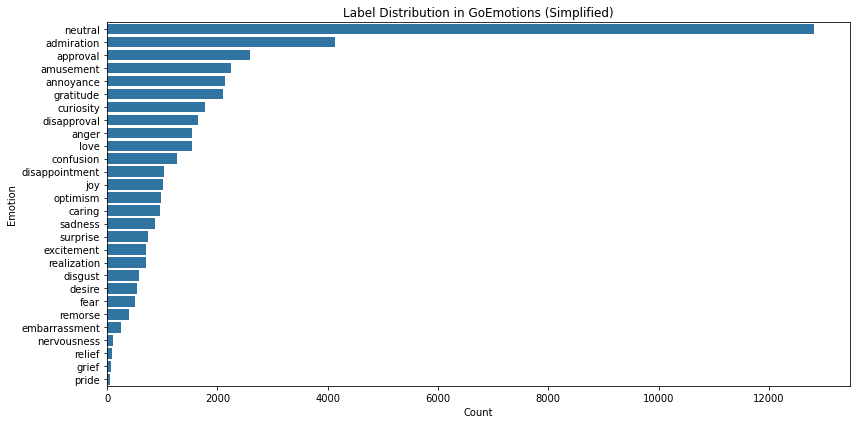

In [3]:
import seaborn as sns

label_names = dataset["train"].features["labels"].feature.names
num_labels = len(label_names)
df['label_name'] = df['labels'].apply(lambda x: label_names[x[0]])

plt.figure(figsize=(12, 6))
sns.countplot(y="label_name", data=df, order=df['label_name'].value_counts().index)
plt.title("Label Distribution in GoEmotions (Simplified)")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.tight_layout()
plt.show()

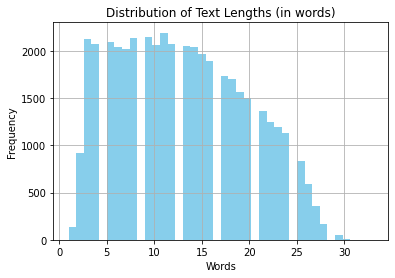

In [4]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['text_len'], bins=40, color='skyblue')
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [5]:
for label in df['label_name'].unique()[:5]:  # Show examples for first 5 labels
    print(f"\n--- {label.upper()} ---")
    print(df[df['label_name'] == label]['text'].sample(3).values)


--- NEUTRAL ---
['Excuse me, I am a very polite roid monkey. ' 'Oh boy, yeah!'
 "Yeah, that's gonna happen"]

--- ANGER ---
['These stupid fucking cunts don’t even use “shade” correctly, [NAME] would toss them off the pier.'
 'Right? It was frustrating (and concerning) that he used such bad reasoning when his job is to curb phishing :/'
 'shucci a lil BITCH']

--- FEAR ---
['Wall St is scared of the 2020 Democratic primary.. Good!'
 'General population are scared of press'
 'The Babylon Bee article makes me worry for [NAME] comic tastes.']

--- ANNOYANCE ---
['You know more liberals want more gun control than regular [NAME] do, right? '
 "Yeah that's where my eyebrow went up. The liability issues alone would make it a non-starter."
 'This sum GTA 5 type shit right here.']

--- SURPRISE ---
['Oh, it’s you again. Here: ' "That's what I was wondering too."
 'oh my [NAME]']


In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


In [9]:
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.rename_column("labels", "label")
tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

In [30]:
!!pip uninstall transformers -y
!pip install transformers --upgrade

  Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)


In [14]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=28)
print(model)

ImportError: cannot import name 'BertForSequenceClassification' from 'transformers' (C:\Users\Akhilesh\Anaconda3\lib\site-packages\transformers\__init__.py)